<a href="https://colab.research.google.com/github/canamac/zeka-can/blob/main/UYUMSUZLUK_RSI_AND_MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Ticker'ı girin (Örnek: AAPL, TSLA, BTC-USD): BTC-USD
2. Ticker'ı girin (Örnek: AAPL, TSLA, BTC-USD): ETH-USD
3. Ticker'ı girin (Örnek: AAPL, TSLA, BTC-USD): SOL-USD
4. Ticker'ı girin (Örnek: AAPL, TSLA, BTC-USD): AVAX-USD
5. Ticker'ı girin (Örnek: AAPL, TSLA, BTC-USD): ADA-USD
Başlangıç tarihini girin (DD.MM.YYYY): 01.01.2024
Bitiş tarihini girin (DD.MM.YYYY): 31.12.2024


[*********************100%***********************]  1 of 1 completed


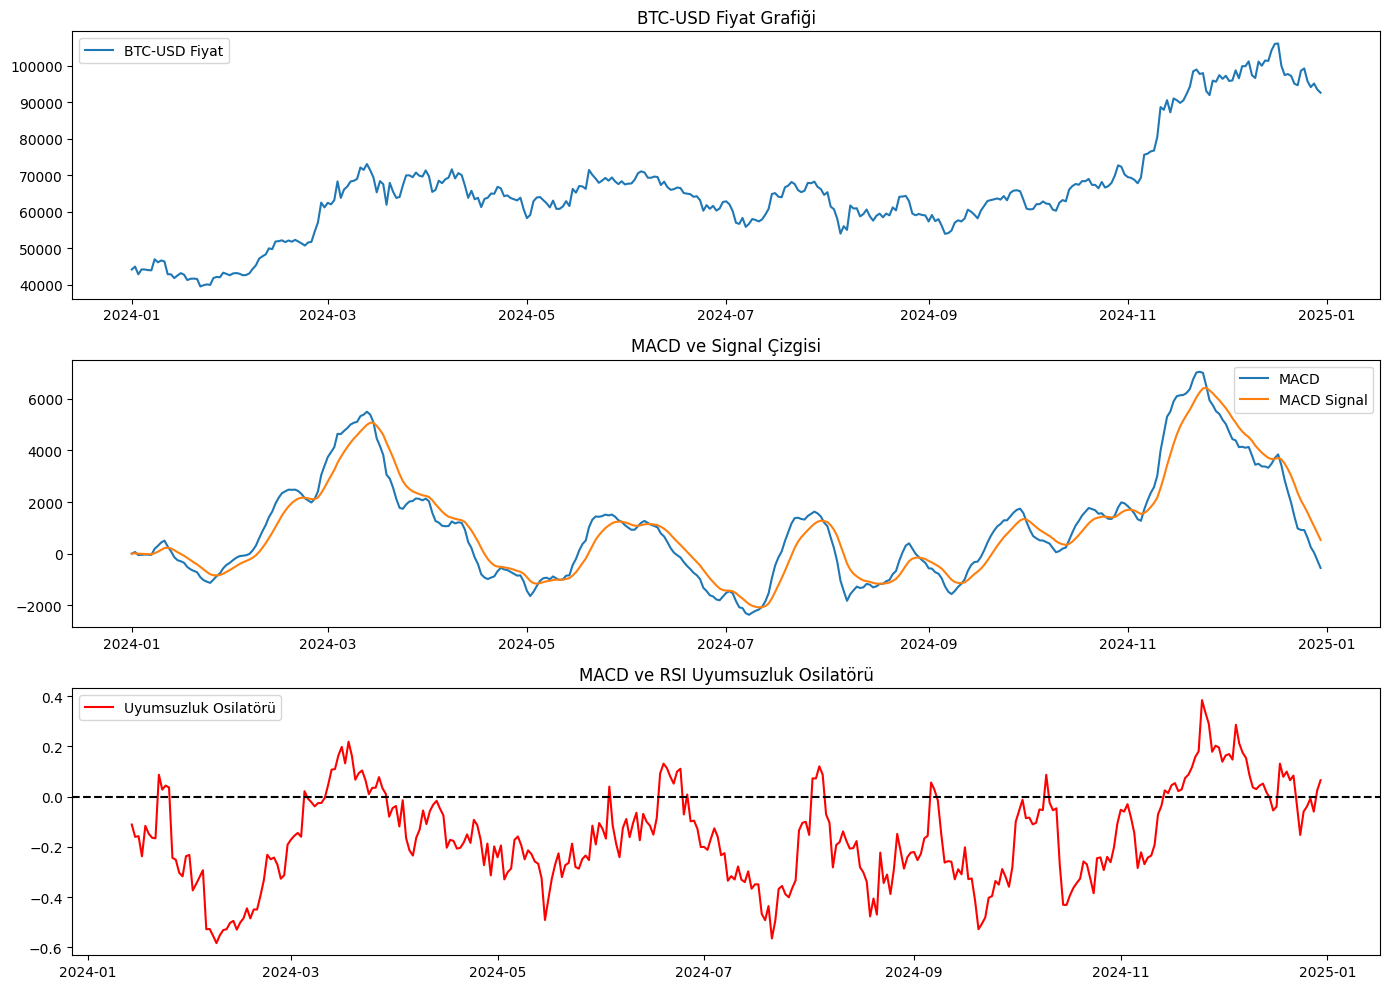

[*********************100%***********************]  1 of 1 completed


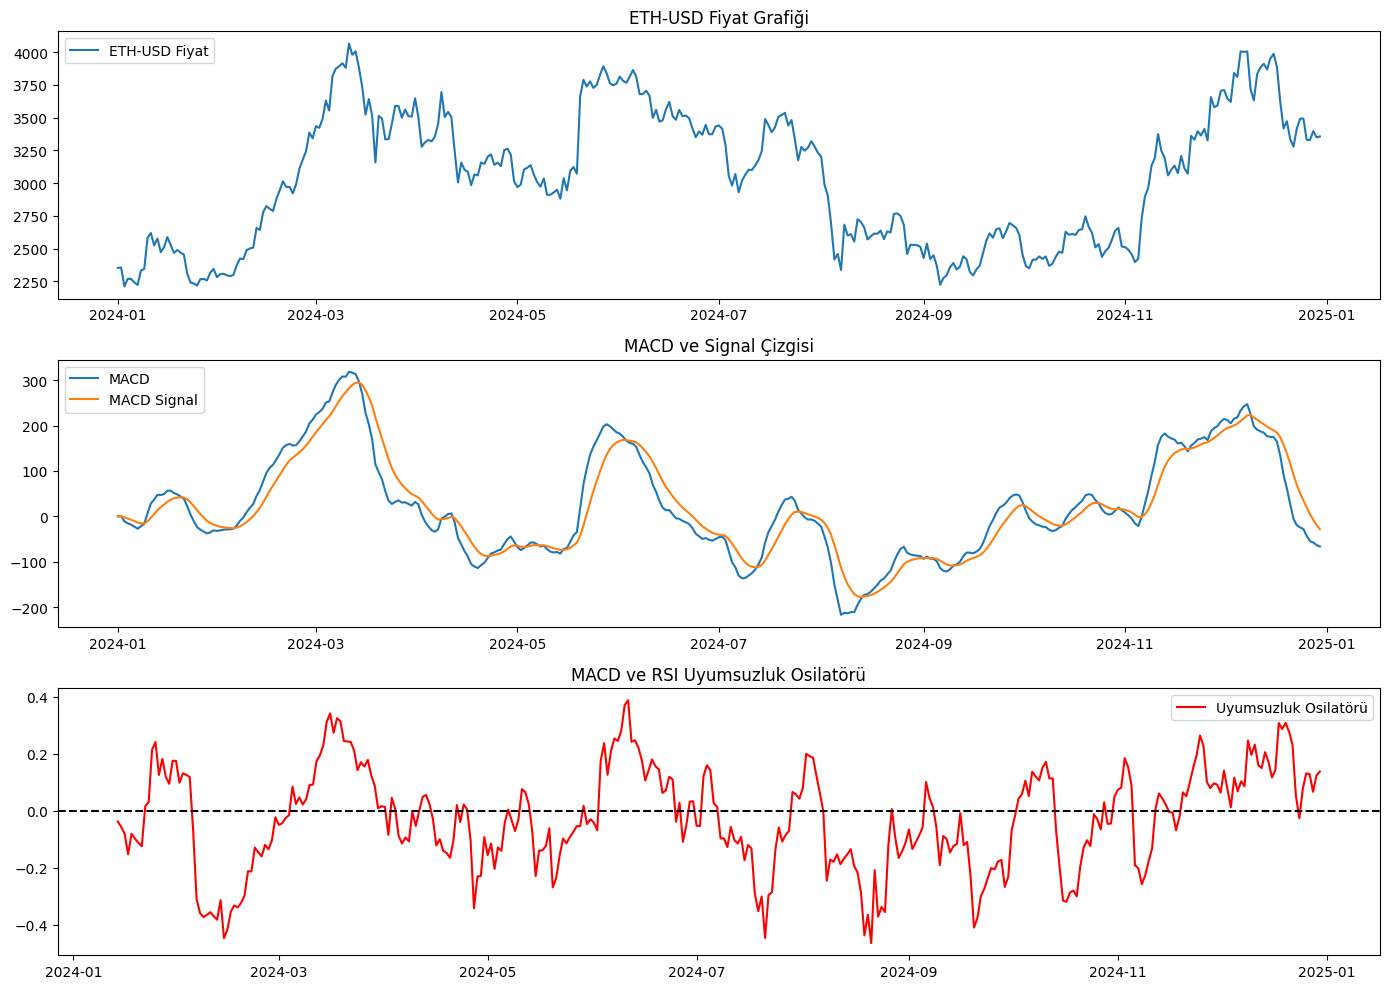

[*********************100%***********************]  1 of 1 completed


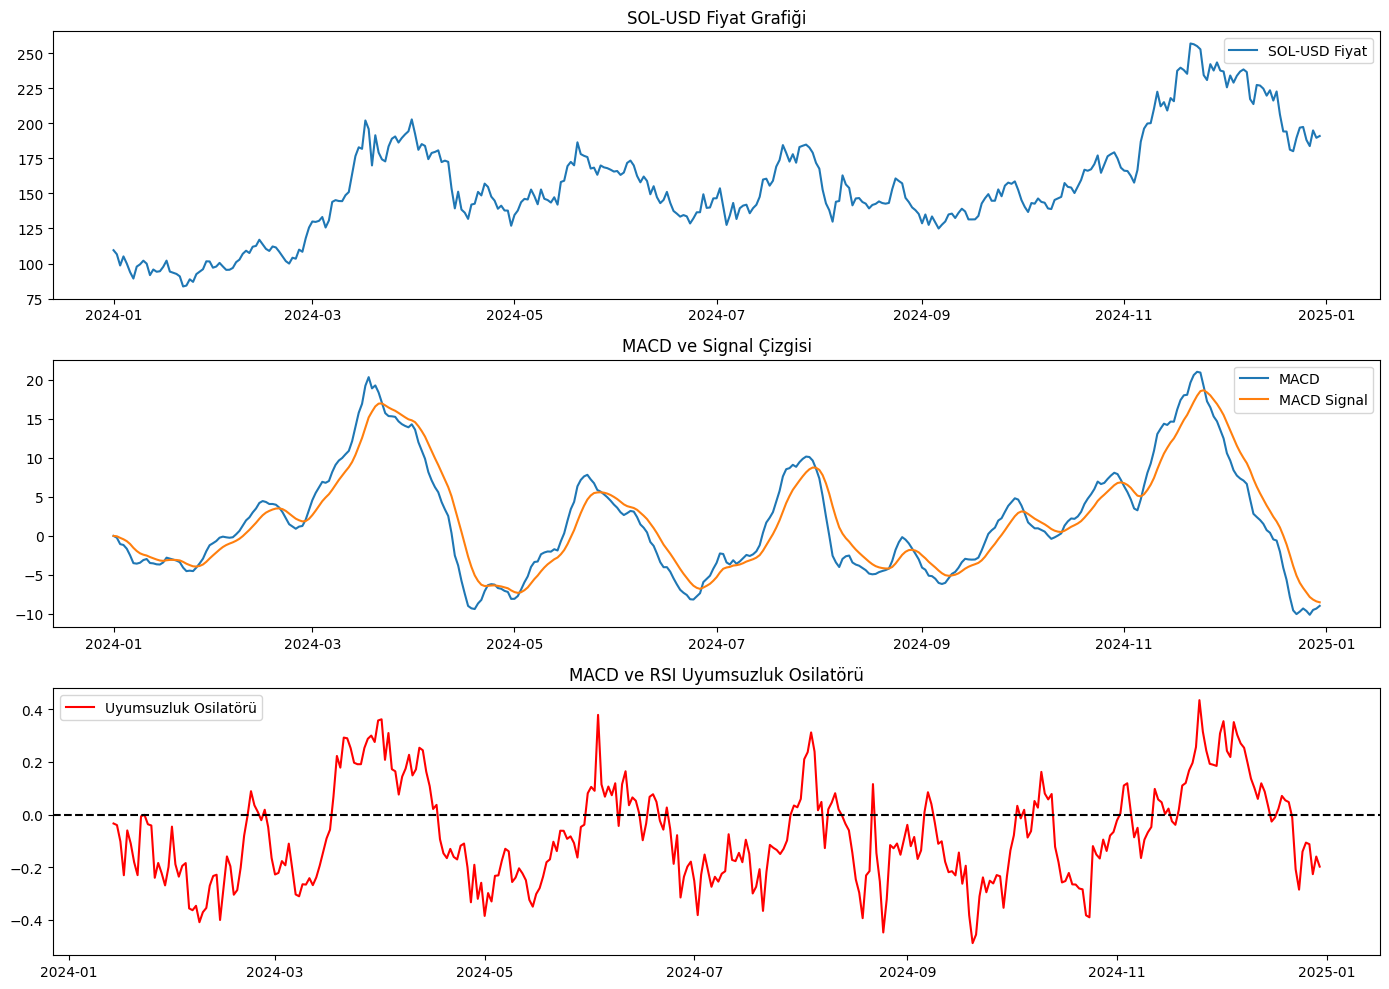

[*********************100%***********************]  1 of 1 completed


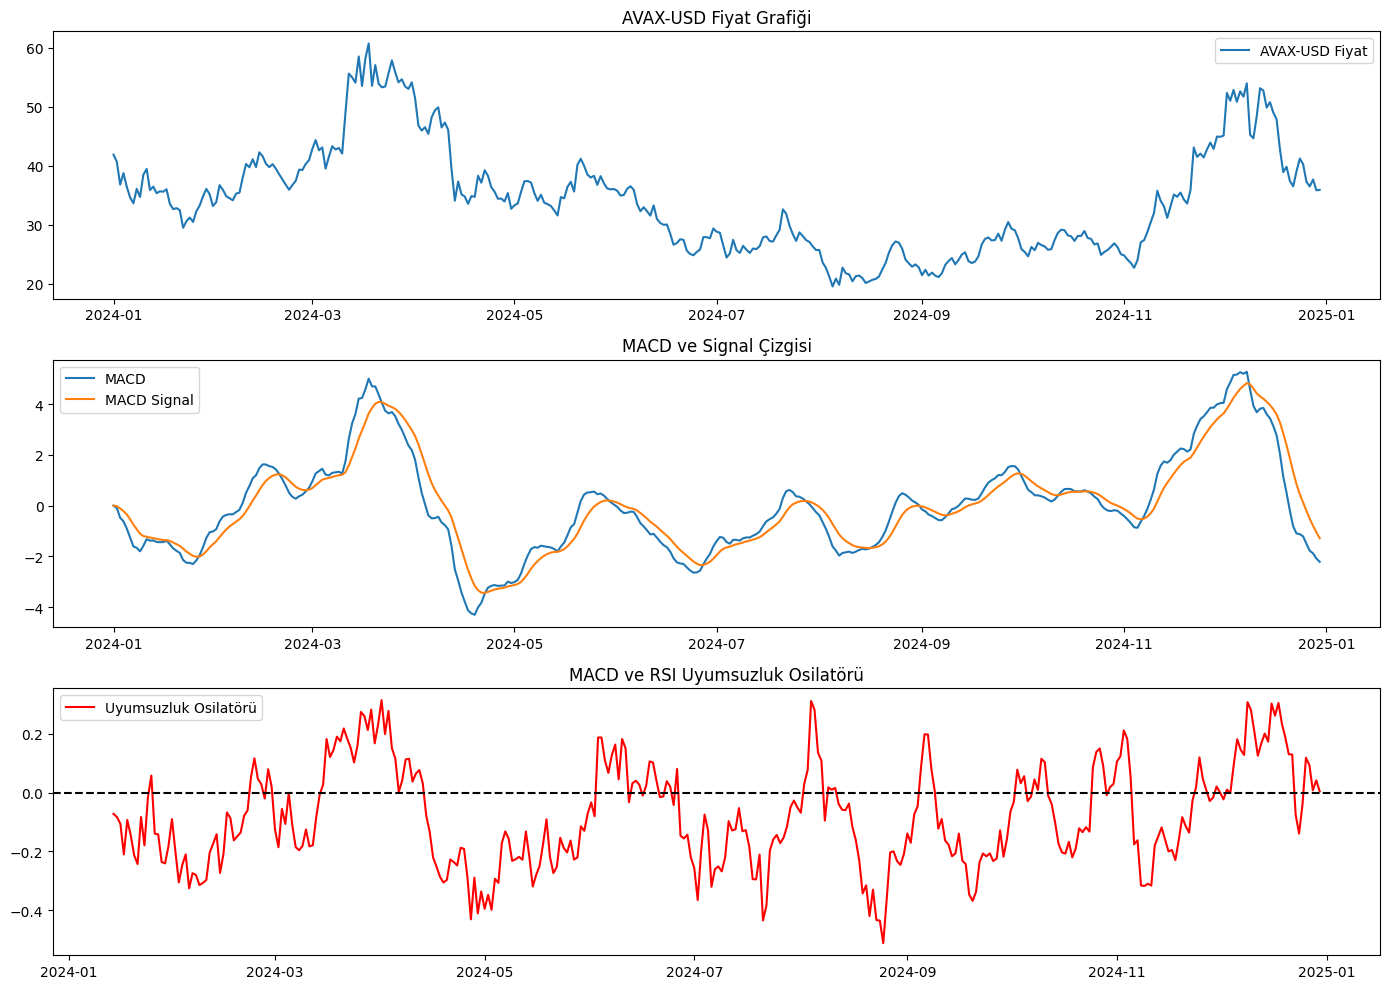

[*********************100%***********************]  1 of 1 completed


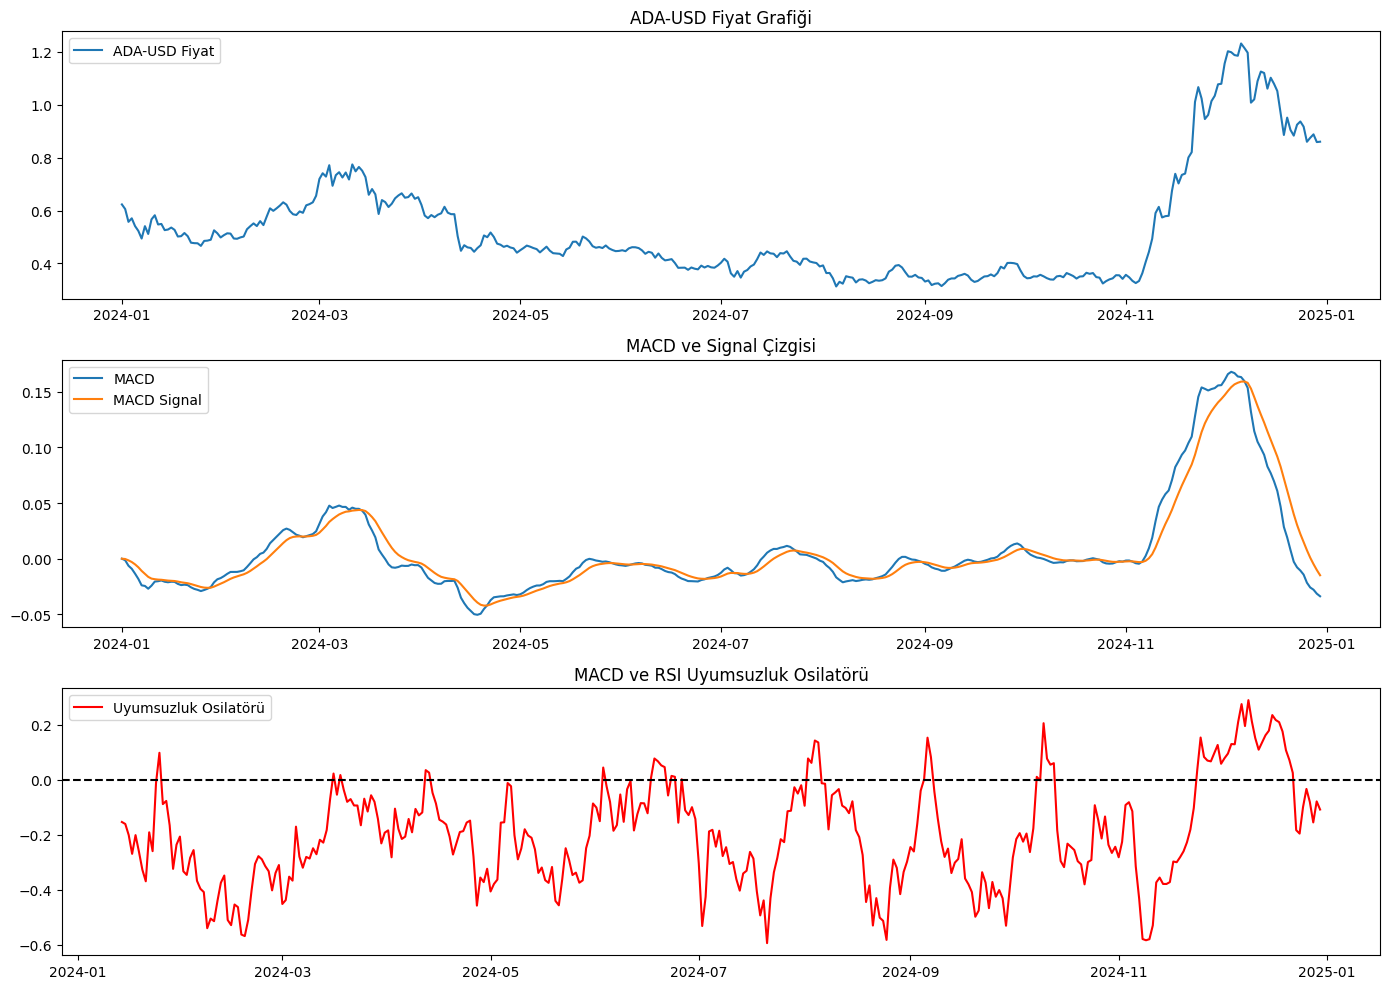

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Tarih formatını dönüştürme fonksiyonu
def convert_date_format(date_str, input_format="%d.%m.%Y", output_format="%Y-%m-%d"):
    try:
        date_obj = datetime.strptime(date_str, input_format)
        return date_obj.strftime(output_format)
    except ValueError as e:
        print(f"Hata: Tarih formatı geçersiz. Lütfen {input_format} formatında girin. Örnek: 01.01.2023")
        return None

# MACD hesaplama fonksiyonu
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# RSI hesaplama fonksiyonu
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Uyumsuzluk osilatörü hesaplama fonksiyonu
def calculate_divergence_oscillator(macd, rsi):
    macd_norm = (macd - macd.min()) / (macd.max() - macd.min())
    rsi_norm = (rsi - rsi.min()) / (rsi.max() - rsi.min())
    divergence_oscillator = macd_norm - rsi_norm
    return divergence_oscillator

# Kullanıcıdan 5 ticker al
tickers = []
for i in range(5):
    ticker = input(f"{i+1}. Ticker'ı girin (Örnek: AAPL, TSLA, BTC-USD): ").strip().upper()
    # USDT yerine USD kullan
    if ticker.endswith("USDT"):
        ticker = ticker.replace("USDT", "USD")
    tickers.append(ticker)

# Başlangıç ve bitiş tarihleri
start_date_input = input("Başlangıç tarihini girin (DD.MM.YYYY): ").strip()
end_date_input = input("Bitiş tarihini girin (DD.MM.YYYY): ").strip()

# Tarih formatını dönüştür
start_date = convert_date_format(start_date_input)
end_date = convert_date_format(end_date_input)

if not start_date or not end_date:
    print("Hata: Geçersiz tarih formatı. Program sonlandırılıyor.")
    exit()

# Her bir ticker için işlemleri gerçekleştir
for ticker in tickers:
    try:
        # Veriyi çekme
        data = yf.download(ticker, start=start_date, end=end_date)['Close']

        # MACD ve RSI hesaplama
        macd, signal = calculate_macd(data)
        rsi = calculate_rsi(data)

        # Uyumsuzluk osilatörü hesaplama
        divergence_oscillator = calculate_divergence_oscillator(macd, rsi)

        # Grafik çizme
        plt.figure(figsize=(14, 10))

        plt.subplot(3, 1, 1)
        plt.plot(data, label=f'{ticker} Fiyat')
        plt.title(f'{ticker} Fiyat Grafiği')
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.plot(macd, label='MACD')
        plt.plot(signal, label='MACD Signal')
        plt.title('MACD ve Signal Çizgisi')
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.plot(divergence_oscillator, label='Uyumsuzluk Osilatörü', color='red')
        plt.axhline(0, color='black', linestyle='--')
        plt.title('MACD ve RSI Uyumsuzluk Osilatörü')
        plt.legend()

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"{ticker} için veri çekilirken bir hata oluştu: {e}")